## **Dataset Link**

*https://archive.ics.uci.edu/dataset/53/iris*


# Advanced Hypothesis Testing Analysis


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from scipy.stats import levene

## Task 1: Paired Data Analysis


We'll compare `sepal_length` and `petal_length` measurements within the `Iris-setosa` class as our paired data. The rationale is to determine if there's a significant difference between these two measurements for the same set of flowers.


In [2]:
# Load the iris.data file
iris_data = pd.read_csv("iris.data", header=None)

In [3]:
iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "class",
]

In [8]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Filter out data for the Iris-setosa class
setosa_data = iris_data[iris_data["class"] == "Iris-setosa"]

In [6]:
# Conduct a paired t-test between sepal_length and petal_length for Iris-setosa
t_stat, p_value = ttest_rel(setosa_data["sepal_length"], setosa_data["petal_length"])

In [7]:
t_stat, p_value

(71.68291452906092, 2.818765681112564e-51)

Given the extremely small p-value, we reject the null hypothesis, implying that there is a statistically significant difference between the `sepal_length` and `petal_length` of the Iris-setosa flowers.


C:\Users\usmar\AppData\Local\Temp\ipykernel_6448\2638738684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa_data['difference'] = setosa_data['sepal_length'] - setosa_data['petal_length']


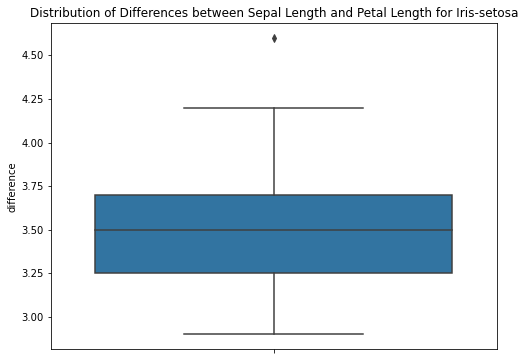

In [10]:
# Calculate the differences between sepal_length and petal_length
setosa_data["difference"] = setosa_data["sepal_length"] - setosa_data["petal_length"]

# Plot a boxplot for the differences
plt.figure(figsize=(8, 6))
sns.boxplot(data=setosa_data, y="difference")
plt.title(
    "Distribution of Differences between Sepal Length and Petal Length for Iris-setosa"
)
plt.show()

## Task 2: Multiple Population Means Analysis


We'll compare the means of `sepal_length` across the three iris classes (`Iris-setosa`, `Iris-versicolor`, `Iris-virginica`). The objective is to determine if there's a significant difference in the mean sepal length among these three species.


In [12]:
# Conduct an ANOVA test for sepal_length across the three iris classes
f_stat, p_value_anova = f_oneway(
    iris_data[iris_data["class"] == "Iris-setosa"]["sepal_length"],
    iris_data[iris_data["class"] == "Iris-versicolor"]["sepal_length"],
    iris_data[iris_data["class"] == "Iris-virginica"]["sepal_length"],
)

f_stat, p_value_anova

(119.26450218450468, 1.6696691907693826e-31)

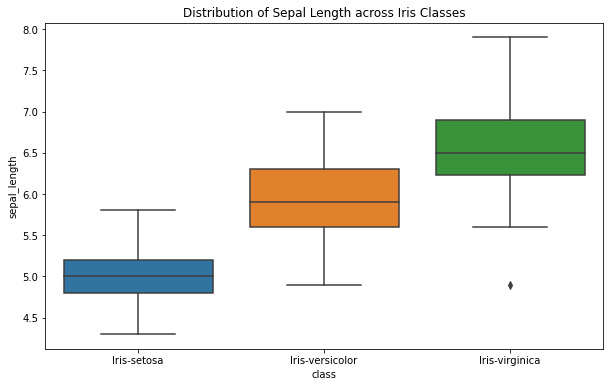

In [13]:
# Plot a boxplot for the sepal_length across the three iris classes
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_data, x="class", y="sepal_length")
plt.title("Distribution of Sepal Length across Iris Classes")
plt.show()

## Task 3: Variance Comparison Analysis


We'll compare the variances in `petal_length` between the `Iris-versicolor` and `Iris-virginica` classes. The goal is to determine if there's a significant difference in the variance of petal lengths between these two species.


In [15]:
# Conduct a Levene's test for petal_length between Iris-versicolor and Iris-virginica
w_stat, p_value_levene = levene(
    iris_data[iris_data["class"] == "Iris-versicolor"]["petal_length"],
    iris_data[iris_data["class"] == "Iris-virginica"]["petal_length"],
)

w_stat, p_value_levene

(1.0674381993787974, 0.30406773202289633)

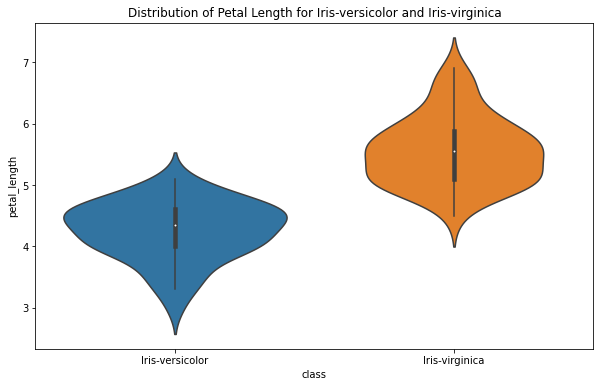

In [16]:
# Plot a violin plot for the petal_length of Iris-versicolor and Iris-virginica
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=iris_data[iris_data["class"].isin(["Iris-versicolor", "Iris-virginica"])],
    x="class",
    y="petal_length",
)
plt.title("Distribution of Petal Length for Iris-versicolor and Iris-virginica")
plt.show()